# Question 3: <br>Poverty Campaign and Reoccuring Donors



The client has noticed that a larger percentage of donors to their “Poverty” campaign - relative to their other campaigns - are recurring donors. They believe this difference to be statistically significant.

This model is training to predict the donor type to see which table is correct for donor type and to fill in the null values

In [1]:
#imports packages

#import base and visualization packages
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

#cross validation
from sklearn.model_selection import train_test_split

#Scaler

from sklearn.preprocessing import StandardScaler

#estimators
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
#Impot Model Tuning
from sklearn.model_selection import GridSearchCV

In [2]:
#import data and show head
donations = pd.read_csv('assessment_data.csv', header=0)
donations.head()

,donation_id,age,age_group,campaign_name,channel,donation_revenue,donor_type,dup_donor_type,donor_type_mismatch,entertainment,...,spending_on_food,state,us_region,campaign_n,channel_n,donor_type_n,gender_n,state_n,us_region_n,age_group_n
0,1,30,25-34 years old,General,organic,74.98,one-time,one-time,0,224.23,...,232.56,AZ,West,1,3,1.0,1.0,2,3,3
1,2,39,35-44 years old,General,organic,68.60,one-time,one-time,0,314.23,...,322.04,AR,South,1,3,1.0,1.0,1,2,4
2,3,24,18-24 years old,General,organic,44.85,recurring,recurring,0,165.23,...,197.80,LA,South,1,3,2.0,1.0,3,2,2
3,4,33,25-34 years old,General,organic,39.91,one-time,one-time,0,300.67,...,360.64,MO,Midwest,1,3,1.0,2.0,5,1,3
4,5,67,65-74 years old,Homelessness,email,111.13,one-time,one-time,0,190.67,...,264.75,SD,Midwest,2,2,1.0,2.0,9,1,7


In [3]:
#show info for inter datatypes
#shows that average age is 39, average donation revenue is $84
donations.describe()

,donation_id,age,donation_revenue,donor_type_mismatch,entertainment,spending_on_food,campaign_n,channel_n,donor_type_n,gender_n,state_n,us_region_n,age_group_n
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4734.000000,4800.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,39.515800,84.404846,0.053200,220.914166,270.451806,1.500000,2.699000,1.105619,1.500000,6.200800,1.893200,3.998800
std,1443.520003,8.283639,67.853195,0.224455,75.693483,68.667928,0.670887,1.153545,0.307382,0.500052,3.279486,0.581946,0.888682
min,1.000000,10.000000,-5.110000,0.000000,-59.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1250.750000,34.000000,36.537500,0.000000,158.230000,224.227500,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000
50%,2500.500000,39.000000,65.250000,0.000000,225.670000,269.255000,1.000000,3.000000,1.000000,1.500000,7.000000,2.000000,4.000000
75%,3750.250000,45.000000,113.022500,0.000000,276.057500,316.860000,2.000000,4.000000,1.000000,2.000000,10.000000,2.000000,5.000000
max,5000.000000,68.000000,576.290000,1.000000,482.230000,562.800000,3.000000,4.000000,2.000000,2.000000,10.000000,3.000000,8.000000


In [4]:
#provide overview of file and check for null values
#100 null values for donor type and 200 null values for age
donations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   donation_id          5000 non-null   int64  
 1   age                  5000 non-null   int64  
 2   age_group            5000 non-null   object 
 3   campaign_name        5000 non-null   object 
 4   channel              5000 non-null   object 
 5   donation_revenue     5000 non-null   float64
 6   donor_type           4900 non-null   object 
 7   dup_donor_type       5000 non-null   object 
 8   donor_type_mismatch  5000 non-null   int64  
 9   entertainment        5000 non-null   float64
 10  gender               4800 non-null   object 
 11  spending_on_food     5000 non-null   float64
 12  state                5000 non-null   object 
 13  us_region            5000 non-null   object 
 14  campaign_n           5000 non-null   int64  
 15  channel_n            5000 non-null   i

In [5]:
#removed ID field
del donations['donation_id']

# Exploratory Data Analysis

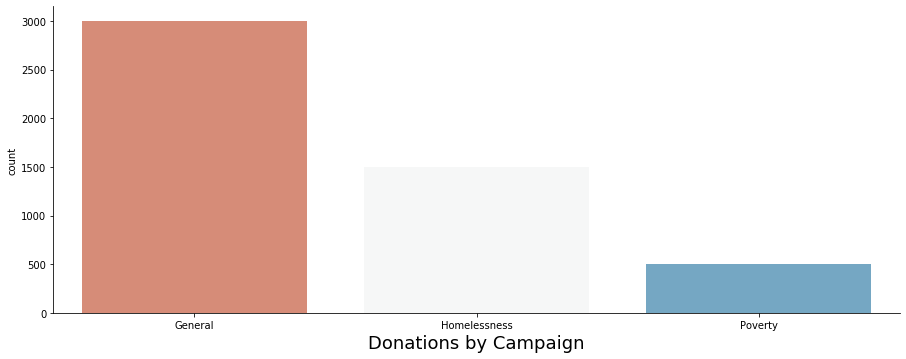

In [6]:
#show count of donations by campaign
g = sns.catplot('campaign_name', data=donations, kind='count', aspect=2.5,palette='RdBu')
g.set_xlabels('Donations by Campaign', size=18)

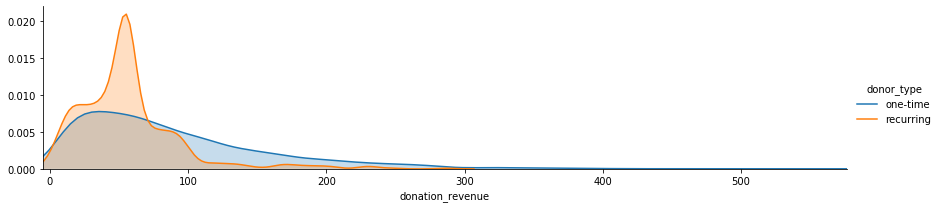

In [7]:
#show distribution of revenue by donor type
fig = sns.FacetGrid(donations, hue='donor_type', aspect=4)
fig.map(sns.kdeplot, 'donation_revenue', shade=True)
oldest = donations['donation_revenue'].max()
youngest = donations['donation_revenue'].min()
fig.set(xlim=(youngest,oldest))
fig.add_legend()

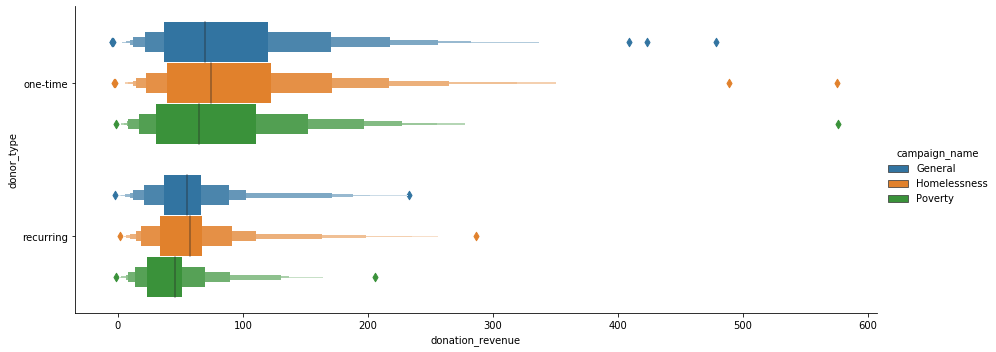

In [8]:
# Survived vs. class Grouped by gender
sns.catplot('donation_revenue','donor_type', hue = 'campaign_name', kind ='boxen', data=donations, aspect=2.5)

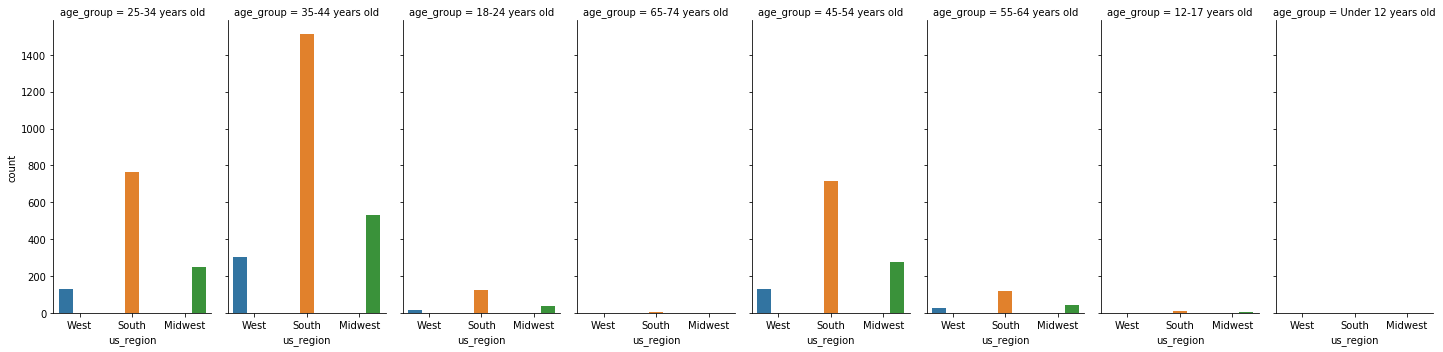

In [45]:

sns.catplot('us_region', data=donations, col='age_group', kind='count', hue='us_region', aspect=.5)

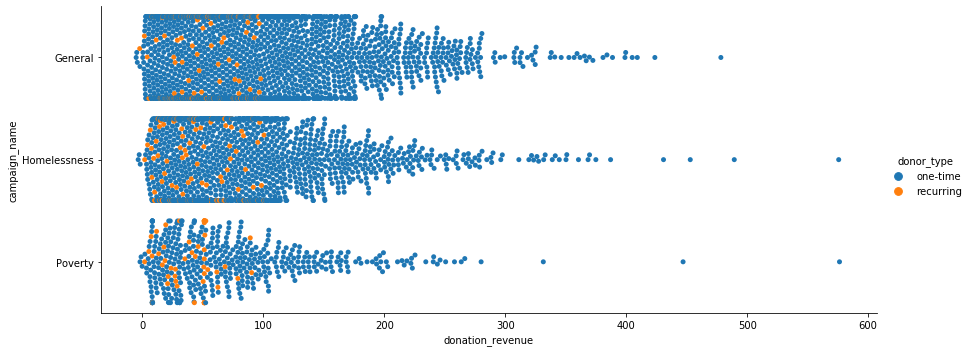

In [10]:
# Swarm chart with by donor type and campaign
sns.catplot('donation_revenue','campaign_name', hue = 'donor_type', kind ='swarm', data=donations_clean, aspect=2.5)

In [11]:
donations.pivot_table('donation_revenue', 'campaign_name', 'donor_type', aggfunc=np.sum, margins=True)

donor_type,one-time,recurring,All
campaign_name,,,
General,225583.39,22278.24,247861.63
Homelessness,116812.54,11540.28,128352.82
Poverty,32685.14,3625.64,36310.78
All,375081.07,37444.16,412525.23


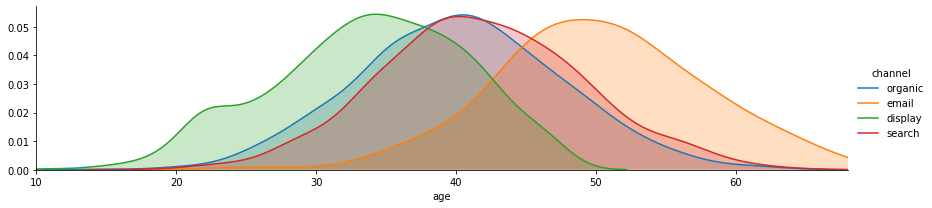

In [13]:
#create chart for distribution of donates by age and channel 
fig = sns.FacetGrid(donations, hue='channel', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = donations['age'].max()
youngest = donations['age'].min()
fig.set(xlim=(youngest,oldest))
fig.add_legend()

In [14]:
donations.pivot_table('donation_revenue', 'channel', 'age', aggfunc=np.sum, margins=True)

age,10,12,14,15,16,17,18,19,20,21,...,60,61,62,63,64,65,66,67,68,All
channel,,,,,,,,,,,,,,,,,,,,,
display,30.39,15.97,NaN,123.52,41.16,92.93,377.92,492.43,758.52,411.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106761.52
email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,810.82,518.37,455.42,610.46,256.37,426.20,NaN,312.78,55.0,20306.22
organic,NaN,NaN,51.23,54.24,NaN,NaN,17.11,NaN,182.83,109.84,...,188.11,673.16,1360.64,165.46,NaN,NaN,55.0,NaN,NaN,172113.69
search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.39,NaN,61.61,...,823.35,220.85,660.51,NaN,91.35,78.52,NaN,NaN,NaN,122842.80
All,30.39,15.97,51.23,177.76,41.16,92.93,395.03,512.82,941.35,582.49,...,1822.28,1412.38,2476.57,775.92,347.72,504.72,55.0,312.78,55.0,422024.23


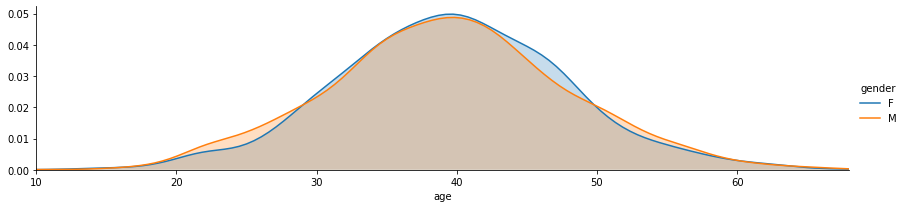

In [15]:
#create chart for distribution of donates by age and gender. 

fig = sns.FacetGrid(donations, hue='gender', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = donations['age'].max()
youngest = donations['age'].min()
fig.set(xlim=(youngest,oldest))
fig.add_legend()

In [16]:
#pivot table by gender and age for donation revenue

donations.pivot_table('donation_revenue', 'gender', 'age', aggfunc=np.sum, margins=True)



age,10,12,14,15,16,17,18,19,20,21,...,60,61,62,63,64,65,66,67,68,All
gender,,,,,,,,,,,,,,,,,,,,,
F,NaN,15.97,51.23,109.90,29.89,23.25,128.69,212.64,413.63,208.42,...,537.49,901.61,1305.02,381.67,251.43,78.52,NaN,36.85,55.0,201215.51
M,30.39,NaN,NaN,67.86,11.27,69.68,266.34,300.18,527.72,270.68,...,1284.79,510.77,1171.55,394.25,96.29,426.20,55.0,275.93,NaN,203226.73
All,30.39,15.97,51.23,177.76,41.16,92.93,395.03,512.82,941.35,479.10,...,1822.28,1412.38,2476.57,775.92,347.72,504.72,55.0,312.78,55.0,404442.24


More males donate between 20-28 than females, but are less likely to donate between 45-50 than females.

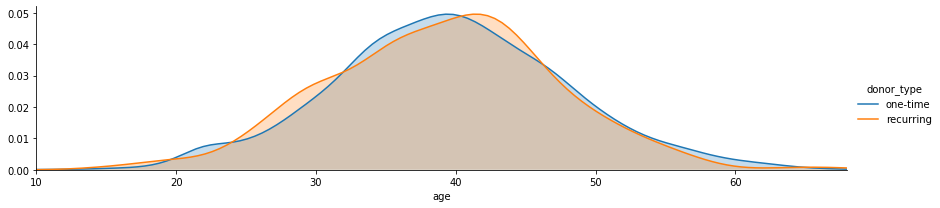

In [17]:
#create chart for distribution of donates by age and gender. 

fig = sns.FacetGrid(donations, hue='donor_type', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = donations['age'].max()
youngest = donations['age'].min()
fig.set(xlim=(youngest,oldest))
fig.add_legend()

In [18]:
donations.pivot_table('donation_revenue', 'donor_type', 'age', aggfunc=np.sum, margins=True)




age,10,12,14,15,16,17,18,19,20,21,...,60,61,62,63,64,65,66,67,68,All
donor_type,,,,,,,,,,,,,,,,,,,,,
one-time,30.39,15.97,51.23,105.86,41.16,71.58,324.73,372.62,744.63,582.49,...,1822.28,1412.38,2476.57,693.80,347.72,453.47,NaN,312.78,NaN,375081.07
recurring,NaN,NaN,NaN,71.90,NaN,21.35,70.30,140.20,196.72,NaN,...,NaN,NaN,NaN,82.12,NaN,51.25,55.0,NaN,55.0,37444.16
All,30.39,15.97,51.23,177.76,41.16,92.93,395.03,512.82,941.35,582.49,...,1822.28,1412.38,2476.57,775.92,347.72,504.72,55.0,312.78,55.0,412525.23


# Correlation Matrix

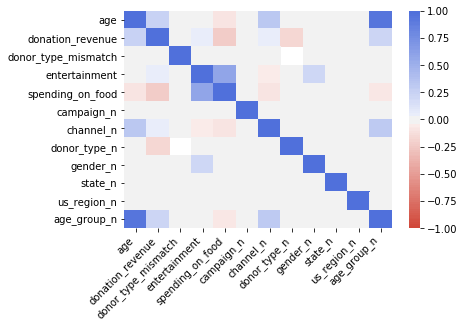

In [19]:
#show correlation grid with numerical values. 
corr = donations.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(15, 260, n=100),
    square=False
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Preprocessing Donations file for model creation

In [20]:
#creating new dataset removing the mismatched donor types 
#filtering dataset where donor type mismatch is not true
donations_filtered = donations[(donations['donor_type_mismatch']== 0)]
donations_na = donations[(donations['donor_type_mismatch']== 1)]

In [21]:
donations_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4734 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4734 non-null   int64  
 1   age_group            4734 non-null   object 
 2   campaign_name        4734 non-null   object 
 3   channel              4734 non-null   object 
 4   donation_revenue     4734 non-null   float64
 5   donor_type           4734 non-null   object 
 6   dup_donor_type       4734 non-null   object 
 7   donor_type_mismatch  4734 non-null   int64  
 8   entertainment        4734 non-null   float64
 9   gender               4546 non-null   object 
 10  spending_on_food     4734 non-null   float64
 11  state                4734 non-null   object 
 12  us_region            4734 non-null   object 
 13  campaign_n           4734 non-null   int64  
 14  channel_n            4734 non-null   int64  
 15  donor_type_n         4734 non-null   f

In [22]:
#remove donor_mismatch and age group fields to avoid over fitting. Removin string value columns
del donations_filtered['age_group']
del donations_filtered['age_group_n']
del donations_filtered['campaign_name']
del donations_filtered['channel']
del donations_filtered['gender']
del donations_filtered['gender_n']
del donations_filtered['donor_type']
del donations_filtered['state']
del donations_filtered['dup_donor_type']
del donations_filtered['donor_type_mismatch']
del donations_filtered['us_region']

del donations_na['age_group']
del donations_na['age_group_n']
del donations_na['campaign_name']
del donations_na['channel']
del donations_na['gender']
del donations_na['gender_n']
del donations_na['donor_type']
del donations_na['state']
del donations_na['dup_donor_type']
del donations_na['donor_type_mismatch']
del donations_na['us_region']

In [23]:
# Copy dataframe
donations_donor = donations_filtered.copy(deep=True)
donations_pred = donations_na.copy(deep=True)

In [24]:
# Convert numberical variables to categorical for model building

donations_donor['campaign_n'] = pd.Categorical(donations_filtered['campaign_n'])
donations_donor['channel_n'] = pd.Categorical(donations_filtered['channel_n'])
donations_donor['donor_type_n'] = pd.Categorical(donations_filtered['donor_type_n'])
donations_donor['state_n'] = pd.Categorical(donations_filtered['state_n'])
donations_donor['us_region_n'] = pd.Categorical(donations_filtered['us_region_n'])


donations_pred['campaign_n'] = pd.Categorical(donations_na['campaign_n'])
donations_pred['channel_n'] = pd.Categorical(donations_na['channel_n'])
donations_pred['donor_type_n'] = pd.Categorical(donations_na['donor_type_n'])
donations_pred['state_n'] = pd.Categorical(donations_na['state_n'])
donations_pred['us_region_n'] = pd.Categorical(donations_na['us_region_n'])

In [25]:
# dropping rows with null values
donations_donor.dropna(axis=0,inplace=True)



# Create Testing/Training Dataset

In [26]:
#get column #'s for features dataset
donations_donor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4734 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               4734 non-null   int64   
 1   donation_revenue  4734 non-null   float64 
 2   entertainment     4734 non-null   float64 
 3   spending_on_food  4734 non-null   float64 
 4   campaign_n        4734 non-null   category
 5   channel_n         4734 non-null   category
 6   donor_type_n      4734 non-null   category
 7   state_n           4734 non-null   category
 8   us_region_n       4734 non-null   category
dtypes: category(5), float64(3), int64(1)
memory usage: 208.9 KB


In [27]:
donations_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 8 to 4977
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               266 non-null    int64   
 1   donation_revenue  266 non-null    float64 
 2   entertainment     266 non-null    float64 
 3   spending_on_food  266 non-null    float64 
 4   campaign_n        266 non-null    category
 5   channel_n         266 non-null    category
 6   donor_type_n      0 non-null      category
 7   state_n           266 non-null    category
 8   us_region_n       266 non-null    category
dtypes: category(5), float64(3), int64(1)
memory usage: 12.5 KB


In [28]:
#rearrange columns 
donations_donor = donations_donor[['age', 'entertainment', 'spending_on_food','campaign_n','channel_n','state_n','us_region_n','donation_revenue','donor_type_n']]
#rearrange columns 
donations_pred = donations_pred[['age', 'entertainment', 'spending_on_food','campaign_n','channel_n','state_n','us_region_n','donation_revenue','donor_type_n']]

In [29]:
donations_donor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4734 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               4734 non-null   int64   
 1   entertainment     4734 non-null   float64 
 2   spending_on_food  4734 non-null   float64 
 3   campaign_n        4734 non-null   category
 4   channel_n         4734 non-null   category
 5   state_n           4734 non-null   category
 6   us_region_n       4734 non-null   category
 7   donation_revenue  4734 non-null   float64 
 8   donor_type_n      4734 non-null   category
dtypes: category(5), float64(3), int64(1)
memory usage: 208.9 KB


In [30]:
#Establish X & Y. Depedant variable is donation type
X_pred = donations_pred.iloc[:,0:8]
Y_pred = donations_pred.iloc[:, -1]
X_pred.head()

,age,entertainment,spending_on_food,campaign_n,channel_n,state_n,us_region_n,donation_revenue
8,29,329.23,307.90,2,1,10,2,71.40
11,37,256.23,218.88,1,4,2,3,51.11
15,37,236.23,274.24,1,3,5,1,57.34
17,35,120.00,318.14,1,4,3,2,1.32
19,37,253.23,242.01,2,4,3,2,47.20


In [31]:
X = donations_donor.iloc[:,0:8]
Y = donations_donor.iloc[:, -1]
X.head()

,age,entertainment,spending_on_food,campaign_n,channel_n,state_n,us_region_n,donation_revenue
0,30,224.23,232.56,1,3,2,3,74.98
1,39,314.23,322.04,1,3,1,2,68.60
2,24,165.23,197.80,1,3,3,2,44.85
3,33,300.67,360.64,1,3,5,1,39.91
4,67,190.67,264.75,2,2,9,1,111.13


In [32]:
Y.head()

0    1.0
1    1.0
2    2.0
3    1.0
4    1.0
Name: donor_type_n, dtype: category
Categories (2, float64): [1.0, 2.0]

In [33]:
validation_size = 0.2
seed = 2116
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [34]:
X_train.shape, X_validation.shape

((3787, 8), (947, 8))

In [35]:
X_pred.shape, Y_pred.shape

((266, 8), (266,))

# Create Models

In [36]:
# Spot-check algorithms
models = []
models.append(('LR',LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=100)))

In [37]:
# Set seed and created 10 cold cross validiation. Set scorring
folds = 10
seed = 2116
accuracy = 'accuracy'

In [38]:
# Results show mean accuracy values for each algorithm
from sklearn.model_selection import KFold

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=accuracy)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NameError: name 'cross_val_score' is not defined

In [ ]:
# Visualize distribution of accuracy  calculated across cross-validation folds
base_fig = plt.figure()
base_fig.suptitle('Model Comparison')
base_ax = base_fig.add_subplot(111)
plt.boxplot(results)
base_ax.set_xticklabels(names)
plt.show()

# Model Tuning for Random Forest

In [ ]:
max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(50,300,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestClassifier()

rfgrid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10)

In [ ]:
RF_train = rfgrid.fit(X_train, Y_train)

In [ ]:
#Show top parameters for RF out of the box
print("The best parameters are %s with a score of %0.2f"
      % (rfgrid.best_params_, rfgrid.best_score_))

model improved by .02 with tuned parameters

In [44]:
#create results table
rfgrid_results = pd.concat([pd.DataFrame(rfgrid.cv_results_["params"]),pd.DataFrame(rfgrid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
rfgrid_results.head()

NameError: name 'rfgrid' is not defined

In [ ]:
#group results by max features and estimators
rfgrid_contour = rfgrid_results.groupby(['max_features','n_estimators']).mean()
rfgrid_contour

In [ ]:
#pivot data
grid_reset = rfgrid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
grid_pivot

In [ ]:
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

In [ ]:
#visualize tuned model by parameters (2D)
import plotly.graph_objects as go

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning for RF', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [ ]:
#visualize tuned model by parameters (3D)
import plotly.graph_objects as go


fig = go.Figure(data= [go.Surface(z=z, y=y, x=x)], layout=layout )
fig.update_layout(title='Hyperparameter tuning',
                  scene = dict(
                    xaxis_title='n_estimators',
                    yaxis_title='max_features',
                    zaxis_title='Accuracy'),
                  autosize=False,
                  width=600, height=600,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [ ]:
#show the variable importance of the model. Donation revenue and spending on food and entertainment were top 3 factors 
# define the model
fmodel = RandomForestRegressor()
# fit the model
fmodel.fit(X_train, Y_train)
# get importance
importance = fmodel.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
X_train.info()

# Evaluate the Model on Validation Data

In [726]:
from sklearn.metrics import classification_report

RF_Pred = rfgrid.predict(X_validation) 
  
# print classification report 
print(classification_report(Y_validation, RF_Pred)) 
# Compute and print metrics
print("Accuracy: {}".format(rfgrid.score(X_validation, Y_validation)))
print("Tuned Model Parameters: {}".format(rfgrid.best_params_))

              precision    recall  f1-score   support

         1.0       0.92      1.00      0.96       846
         2.0       1.00      0.32      0.48       101

    accuracy                           0.93       947
   macro avg       0.96      0.66      0.72       947
weighted avg       0.93      0.93      0.91       947

Accuracy: 0.9271383315733897
Tuned Model Parameters: {'max_features': 5, 'n_estimators': 260}


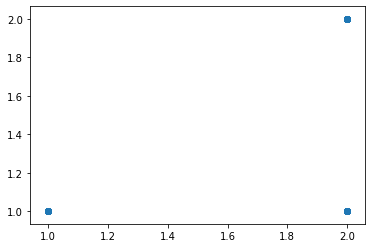

In [727]:
predictions= rfgrid.predict(X_validation)

plt.scatter(Y_validation,predictions)

model remains accurate with new data<br><br><br>

# Make Predictions

In [728]:
Y_pred.shape

(266,)

In [729]:
X_pred.shape

(266, 8)

In [730]:
predictions = rfgrid.predict(X_pred)

In [731]:
predition_results = predictions.tolist()
predition_results

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [732]:
X_pred['predicted_donated_type'] = predictions

In [733]:
X_pred

,age,entertainment,spending_on_food,campaign_n,channel_n,state_n,us_region_n,donation_revenue,predicted_donated_type
8,29,329.23,307.90,2,1,10,2,71.40,1.0
11,37,256.23,218.88,1,4,2,3,51.11,1.0
15,37,236.23,274.24,1,3,5,1,57.34,1.0
17,35,120.00,318.14,1,4,3,2,1.32,1.0
19,37,253.23,242.01,2,4,3,2,47.20,1.0
...,...,...,...,...,...,...,...,...,...
4788,48,120.00,232.27,1,2,5,1,21.13,1.0
4837,38,274.67,348.36,1,3,1,2,10.19,1.0
4945,39,293.67,312.07,2,3,3,2,127.74,1.0
4963,44,146.67,228.24,1,4,10,2,50.11,1.0


In [734]:
#combine predicitions with DF
donations_predicted_final = pd.merge(donations_pred,X_pred[['predicted_donated_type']],how = 'left',left_index = True, right_index = True)

In [735]:
donations_predicted_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 8 to 4977
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     266 non-null    int64   
 1   entertainment           266 non-null    float64 
 2   spending_on_food        266 non-null    float64 
 3   campaign_n              266 non-null    category
 4   channel_n               266 non-null    category
 5   state_n                 266 non-null    category
 6   us_region_n             266 non-null    category
 7   donation_revenue        266 non-null    float64 
 8   donor_type_n            0 non-null      category
 9   predicted_donated_type  266 non-null    float64 
dtypes: category(5), float64(4), int64(1)
memory usage: 24.6 KB


In [736]:
donations_predicted_final.head()

,age,entertainment,spending_on_food,campaign_n,channel_n,state_n,us_region_n,donation_revenue,donor_type_n,predicted_donated_type
8,29,329.23,307.90,2,1,10,2,71.40,NaN,1.0
11,37,256.23,218.88,1,4,2,3,51.11,NaN,1.0
15,37,236.23,274.24,1,3,5,1,57.34,NaN,1.0
17,35,120.00,318.14,1,4,3,2,1.32,NaN,1.0
19,37,253.23,242.01,2,4,3,2,47.20,NaN,1.0


In [737]:
donations_predicted_final

,age,entertainment,spending_on_food,campaign_n,channel_n,state_n,us_region_n,donation_revenue,donor_type_n,predicted_donated_type
8,29,329.23,307.90,2,1,10,2,71.40,NaN,1.0
11,37,256.23,218.88,1,4,2,3,51.11,NaN,1.0
15,37,236.23,274.24,1,3,5,1,57.34,NaN,1.0
17,35,120.00,318.14,1,4,3,2,1.32,NaN,1.0
19,37,253.23,242.01,2,4,3,2,47.20,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...
4788,48,120.00,232.27,1,2,5,1,21.13,NaN,1.0
4837,38,274.67,348.36,1,3,1,2,10.19,NaN,1.0
4945,39,293.67,312.07,2,3,3,2,127.74,NaN,1.0
4963,44,146.67,228.24,1,4,10,2,50.11,NaN,1.0
